In [1]:
# %pip install pyalex 
import pandas as pd
from pyalex import Works, Authors, Sources, Institutions, Concepts, Funders
import pyalex
import matplotlib.pyplot as plt
import math
import numpy as np
import util

# pyalex.config.email = "your@email.address"
pyalex.config.email = "zhmuler@gmail.com"


/Users/ti/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [129]:
# Open Alex 総採録数
print(f"OpenAlexに収録されている論文数は　{Works().count():,}　件")
print(f"研究者数は　{Authors().count():,}　件")
print(f"機関数は　{Institutions().count():,}　件")
print(f"雑誌数は　{Sources().count():,}　件")
print(f"出資機関数　{Funders().count():,}　件")
print(f"Topic数は　{Concepts().count():,}　")


OpenAlexに収録されている論文数は　248,990,199　件
研究者数は　90,278,783　件
機関数は　107,447　件
雑誌数は　251,627　件
出資機関数　32,437　件
Topic数は　65,073　


# 論文のデータ

In [137]:
year_range = range(1950, 2024)

In [138]:
num_publish = [Works().filter(publication_year=i).select(["id"]).count() for i in year_range] # 2023年までに発行された論文を取得
num_publish_gold = [Works().filter(publication_year=i, oa_status='gold').count() for i in year_range]
num_publish_green = [Works().filter(publication_year=i, oa_status='green').count() for i in year_range]

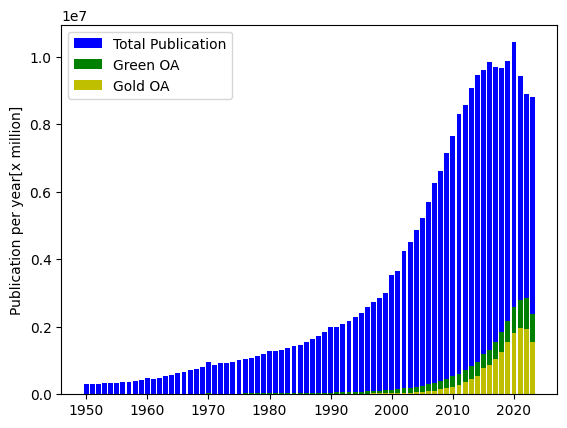

In [139]:
from scipy.optimize import curve_fit

x = np.arange(year_range[0], year_range[-1]+1)

# # 直線の方程式を定義します
# def linear_func(x, m, b):
#     return m * x + b
# # 最小二乗法を使用してパラメータをフィットします
# params, covariance = curve_fit(linear_func, x, np.log(num_publish))
# m_fit, b_fit = params

# 確率密度関数を定義します
def power_law(x, alpha, xmin):
    return math.exp(xmin)*math.exp(alpha*x)
    # return (alpha - 1) / xmin * (x / xmin) ** (-alpha)


# m_fit, b_fit = 2,2
# plt.plot(x, ,'--',c='black', linewidth=1, label='Power Law Fit')
# print("傾き (m):", m_fit)
# print("切片 (b):", b_fit)

bar_width = 0.8
plt.bar(x, num_publish, width=bar_width, color='b', label='Total Publication')
# plt.bar(x, num_publish_green, width=bar_width, color='g', label='Green OA', bottom=num_publish_gold)
# plt.bar(x, num_publish_gold, width=bar_width, color='y', label='Gold OA')
plt.legend()
plt.ylabel("Publication per year[x 10 million]")
plt.show()

#何を読み取ったらいいかがピンとこなかった
#研究者数。機関数の変化を出す、一人当たり
#世界人口、各国別。

In [2]:
# 分野ごと論文数(1970と2010を比較)
fields = pd.read_csv("./domain_field_mapping.csv").set_index("field_id")
for i in range(11,37):
    fields.loc[i,"n_1970"] = Works().filter(publication_year= 1970, primary_topic={"field":{"id":i}}).count()
    fields.loc[i,"n_2020"] = Works().filter(publication_year= 2020, primary_topic={"field":{"id":i}}).count()
fields.sort_values(by="domain_id")

,field_name,domain_id,domain_name,n_1970,n_2020
field_id,,,,,
11,Agricultural and Biological Sciences,1,Life Sciences,71742.0,406350.0
13,"Biochemistry, Genetics and Molecular Biology",1,Life Sciences,53934.0,428911.0
30,"Pharmacology, Toxicology and Pharmaceutics",1,Life Sciences,5399.0,27796.0
28,Neuroscience,1,Life Sciences,11680.0,120943.0
24,Immunology and Microbiology,1,Life Sciences,8025.0,74843.0
12,Arts and Humanities,2,Social Sciences,54828.0,505652.0
14,"Business, Management and Accounting",2,Social Sciences,9865.0,305348.0
33,Social Sciences,2,Social Sciences,96575.0,1581409.0
32,Psychology,2,Social Sciences,17565.0,278905.0


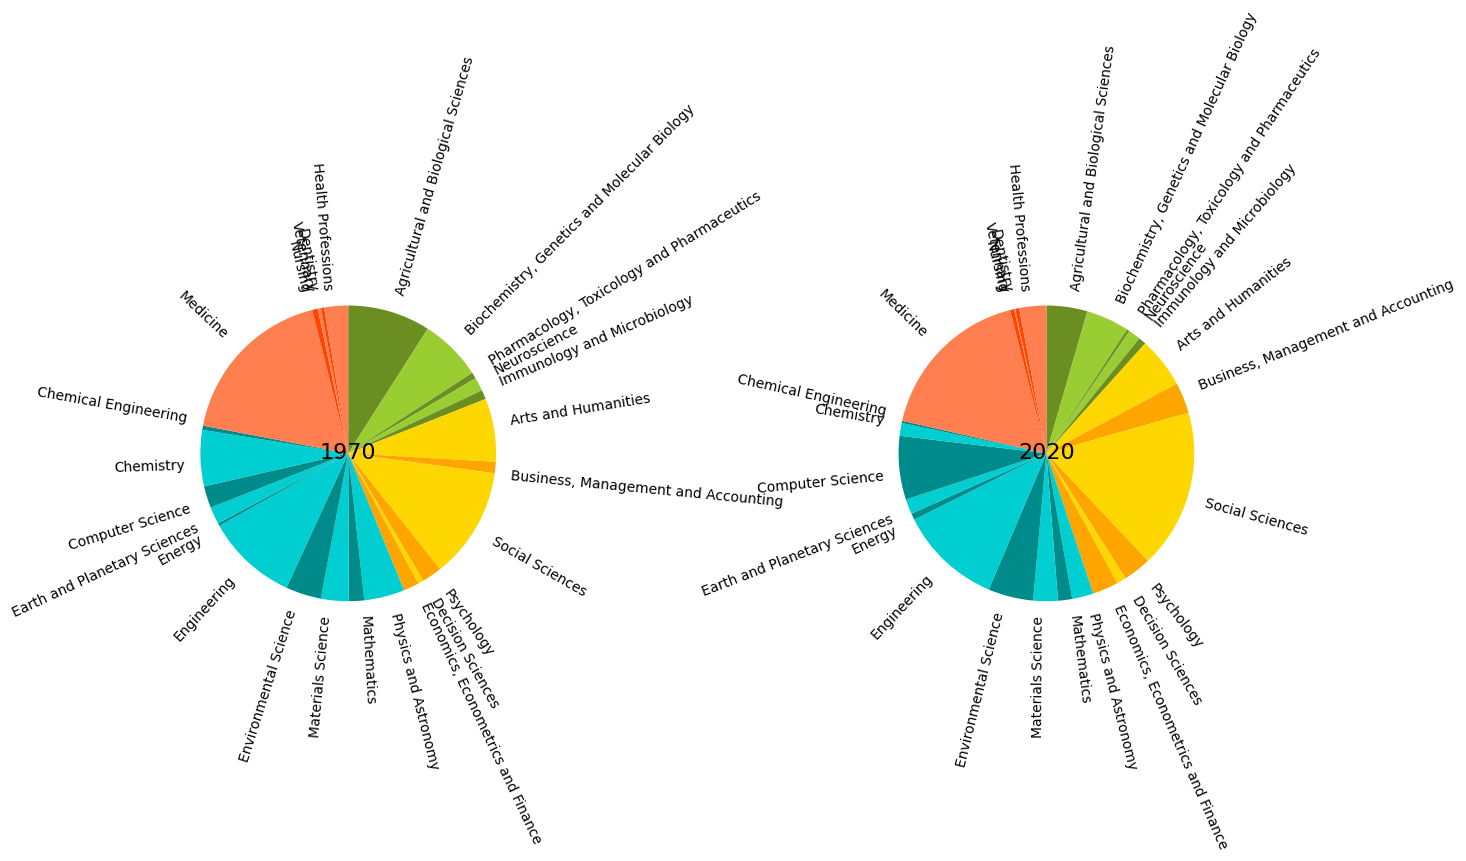

In [3]:
import matplotlib.pyplot as plt

# データ
fields_sorted = fields.sort_values(by="domain_id")

labels = fields_sorted["field_name"]
sizes = fields_sorted["n_1970"]/fields_sorted["n_1970"].sum()
sizes_2010 = fields_sorted["n_2020"]/fields_sorted["n_2020"].sum()

labels =  fields_sorted["field_name"]

#色リストの作成
colors_list = []

# 大分類ごとの色を定義
dark_colors = ['olivedrab','orange' ,'darkcyan', 'orangered'] 
light_colors = [ 'yellowgreen', 'gold','darkturquoise','coral']

# 大分類ごとに交互の色を割り当てる
for i,d in enumerate(fields_sorted["domain_id"]):
    if(i%2==0):colors_list.append(dark_colors[d-1])
    if(i%2==1):colors_list.append(light_colors[d-1])

fig,ax =plt.subplots(1,2)
ax[0].pie(sizes, labels=labels, colors=colors_list,  startangle=90, rotatelabels=True,counterclock=False)
ax[1].pie(sizes_2010, labels=labels, colors=colors_list,  startangle=90, rotatelabels=True,counterclock=False)
ax[0].text(0, 0, '1970', fontsize=16, ha='center', va='center')
ax[1].text(0, 0, '2020', fontsize=16, ha='center', va='center')


plt.subplots_adjust(left=0,right=2)
plt.show()

#円グラフの大きさを変える


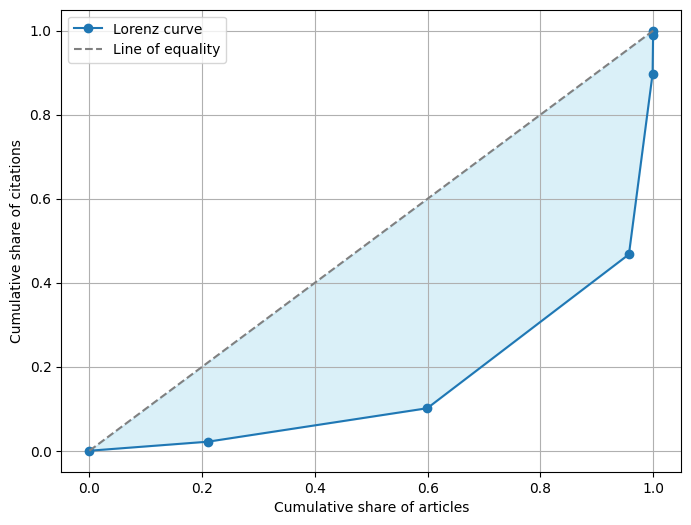

Gini 係数: 0.6852


In [110]:
import numpy as np
import matplotlib.pyplot as plt

# 被引用数の偏り（Gini 係数）
cite_step = [1,2,10,100,1000,10000]
papers_cited = [Works().filter(cited_by_count=f"<{i}").count() for i in cite_step]+[Works().count()] #CDF
papers_cited_jp = [Works().filter(cited_by_count=f"<{i}", ).count() for i in cite_step]+[Works().count()] #CDF

# 引用数と対応する論文数
paper_counts = np.array(papers_cited[1:]) - np.array(papers_cited[:-1]) #PDF
citation_counts = paper_counts*np.array(cite_step)*0.3

# 引用数と論文数の累積分布関数（CDF）を計算
x_cumulative = [0 ]+list(np.cumsum(paper_counts) / np.sum(paper_counts))
y_cumulative = [0 ]+list(np.cumsum(citation_counts) / np.sum(citation_counts))

perfect_equality = np.linspace(0, 1, len(citation_counts))

# ローレンツ曲線の描画
fig, ax = plt.subplots(figsize=(8, 6))

plt.plot(x_cumulative, y_cumulative, label='Lorenz curve', marker='o')
plt.plot([0, 1], [0, 1], '--',color='gray', label='Line of equality')
plt.fill_between(x_cumulative, y_cumulative, x_cumulative, color='skyblue', alpha=0.3)
plt.xlabel('Cumulative share of articles')
plt.ylabel('Cumulative share of citations')
plt.legend()
plt.grid(True)
plt.show()

# Gini係数の計算
gini_index = 1 - 2 * np.trapz(y_cumulative, x=x_cumulative)
print('Gini 係数:', f"{gini_index:.4}")
# 国ごとに科学政策の良し悪しとgini係数
# 何を読み取るのか。格差があるというだけでは思考が深まらない。日本国内とか分野べつ

# 論文誌のデータ

In [115]:
source = Sources().filter(works_count=">1000000").get() # 100万本以上論文が出ている論文誌を取得
print("100万本以上論文が出ている論文誌")
pd.DataFrame(map(lambda x: [x["display_name"], x["host_organization_name"], x["is_oa"],f'{x["works_count"]:,}'],source),
            columns=["論文誌名","論文誌発行機関","OA誌かどうか", "累計論文発行数"])


100万本以上論文が出ている論文誌


,論文誌名,論文誌発行機関,OA誌かどうか,累計論文発行数
0,PubMed,National Institutes of Health,False,"33,075,864"
1,PubMed Central,National Institutes of Health,True,"8,009,760"
2,Europe PMC (PubMed Central),European Bioinformatics Institute,True,"5,316,266"
3,arXiv (Cornell University),Cornell University,True,"3,015,170"
4,DOAJ (DOAJ: Directory of Open Access Journals),None,True,"2,672,478"
5,HAL (Le Centre pour la Communication Scientifi...,French National Centre for Scientific Research,True,"2,571,027"
6,Springer eBooks,Springer Nature,False,"2,519,831"
7,Zenodo (CERN European Organization for Nuclear...,European Organization for Nuclear Research,True,"1,405,433"
8,RePEc: Research Papers in Economics,Federal Reserve Bank of St. Louis,True,"1,126,422"
9,Social Science Research Network,RELX Group (Netherlands),False,"1,079,692"


In [10]:
journals = pd.DataFrame(util.getAll(Sources().filter(apc_usd=">0").select(["id","display_name","summary_stats","apc_usd","works_count","x_concepts"])))

50it [01:30,  1.81s/it]


In [14]:
journals

,id,display_name,summary_stats,apc_usd,works_count,x_concepts
0,https://openalex.org/S106296714,Lecture Notes in Computer Science,"{'2yr_mean_citedness': 1.2204195986447746, 'h_...",5392,505773,"[{'id': 'https://openalex.org/C41008148', 'wik..."
1,https://openalex.org/S49861241,The Lancet,"{'2yr_mean_citedness': 13.206567017887773, 'h_...",6830,467658,"[{'id': 'https://openalex.org/C71924100', 'wik..."
2,https://openalex.org/S137773608,Nature,"{'2yr_mean_citedness': 16.182584623128225, 'h_...",11690,431710,"[{'id': 'https://openalex.org/C86803240', 'wik..."
3,https://openalex.org/S128516502,Notes and Queries,"{'2yr_mean_citedness': 0.022508038585209004, '...",3018,339479,"[{'id': 'https://openalex.org/C95457728', 'wik..."
4,https://openalex.org/S202381698,PLOS ONE,"{'2yr_mean_citedness': 3.159140071217012, 'h_i...",1805,281207,"[{'id': 'https://openalex.org/C86803240', 'wik..."
...,...,...,...,...,...,...
9995,https://openalex.org/S4210218325,Plant-environment interactions,"{'2yr_mean_citedness': 1.2816901408450705, 'h_...",2100,109,"[{'id': 'https://openalex.org/C86803240', 'wik..."
9996,https://openalex.org/S4210224357,Yupa: historical studies journal,"{'2yr_mean_citedness': 0.08695652173913043, 'h...",65,109,"[{'id': 'https://openalex.org/C138885662', 'wi..."
9997,https://openalex.org/S4210227639,Optics,"{'2yr_mean_citedness': 0.98, 'h_index': 9, 'i1...",1082,109,"[{'id': 'https://openalex.org/C121332964', 'wi..."
9998,https://openalex.org/S2738132587,IZA Journal of Labor Economics,"{'2yr_mean_citedness': 0.75, 'h_index': 22, 'i...",1105,108,"[{'id': 'https://openalex.org/C162324750', 'wi..."


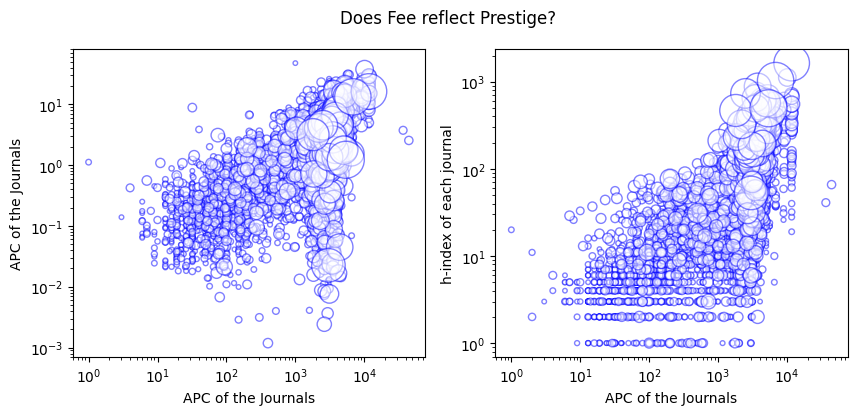

In [13]:
sorted = journals.sort_values(by="works_count",ascending=True)
fig,ax = plt.subplots(1,2,figsize=(10,4))

ax[0].scatter(sorted["apc_usd"],sorted["summary_stats"].apply(lambda x: x["2yr_mean_citedness"]),s=sorted["works_count"].apply(lambda x: math.sqrt(x)),c="white", edgecolors="blue",alpha=0.5)
ax[0].set_xlabel("APC of the Journals")
ax[0].set_ylabel("APC of the Journals")
plt.ylabel("2year mean citedness")
ax[1].scatter(sorted["apc_usd"],sorted["summary_stats"].apply(lambda x: x["h_index"]),s=sorted["works_count"].apply(lambda x: math.sqrt(x)),c="white", edgecolors="blue",alpha=0.5)
ax[1].set_xlabel("APC of the Journals")
ax[1].set_ylabel("h-index of each journal")
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')


plt.suptitle("Does Fee reflect Prestige?")
plt.show()
# nature scienceなどをプロットする
# 大きいやつを手前に
# 分野
# 手を動かす用で、
# 直感的に何がわかったのか分かりにくい

# 機関データ

In [80]:
# Institutions
institution = Institutions().filter(country_code="JP").sort(summary_stats={"h-index":"desc"}).get() # 国コードがJP:日本の機関を取得

pd.DataFrame(map(lambda x: [x["display_name"], x["summary_stats"]["h_index"]],institution),
            columns=["機関名","h-index"]).head(10)

,機関名,h-index
0,The University of Tokyo,727
1,Kyoto University,646
2,Osaka University,598
3,Japan Science and Technology Agency,544
4,Tohoku University,493
5,Nagoya University,436
6,Kyushu University,420
7,National Institute of Advanced Industrial Scie...,392
8,Tokyo Institute of Technology,391
9,Tokyo University of Science,389


In [82]:
institution = Institutions().filter(country_code="JP").sort(summary_stats={"2yr_mean_citedness":"desc"}).get() # 国コードがJP:日本の機関を取得
pd.DataFrame(map(lambda x: [x["display_name"], x["summary_stats"]["2yr_mean_citedness"]],institution),
            columns=["機関名","2年間平均被引用数"]).head(10)

,機関名,2年間平均被引用数
0,Chiba Prefectural Center Museum Otone Branch,69.000000
1,BioBank Japan,34.666667
2,Tomita Hospital,23.333333
3,Institute of Applied Energy,20.454545
4,Kyushu Economic Research Center,19.500000
5,Japan Chemical Industry Association,16.428571
6,Toyama University of International Studies,15.500000
7,Katsumata Hospital,15.500000
8,Mitsukoshi Health and Welfare Foundation,15.200000
9,Nippon Soda (Japan),14.076923


In [ ]:
fields_base = pd.read_csv("./domain_field_mapping.csv").set_index("field_id").drop(["field_name","domain_name"], axis="columns")
for i in range(11,37):
    pyalexObj = Works().filter(publication_year=">2020",cited_by_count=">10",primary_topic={"field":{"id":i}})
    fields_base.loc[i, "count"] = pyalexObj.count()
    sample_count = int(min(500,fields_base.loc[i, "count"]))
    if(sample_count>0):
        citation_counts = pd.DataFrame(util.getAll(pyalexObj.sample(sample_count,seed=42).select(["cited_by_count"])))
        fields_base.loc[i, "c_avg"] = citation_counts["cited_by_count"].mean()

In [14]:
institution_id = "https://openalex.org/I74801974" #東京大学

rca_fields = pd.read_csv("./domain_field_mapping.csv").set_index("field_id")
for i in range(11,37):
    pyalexObj = Works().filter(institution={"id":institution_id}, publication_year=">2020",cited_by_count=">10",primary_topic={"field":{"id":i}})
    rca_fields.loc[i, "count"] = pyalexObj.count()
    if rca_fields.loc[i, "count"]>20:
        citation_counts = pd.DataFrame(util.getAll(pyalexObj.select(["cited_by_count"])))
        rca_fields.loc[i, "c_avg"] = citation_counts["cited_by_count"].mean()

rca = pd.merge(rca_fields.dropna(), fields_base,how="left", on="field_id")


2it [00:02,  1.46s/it]
5it [00:06,  1.34s/it]
2it [00:01,  1.03it/s]
2it [00:02,  1.14s/it]
2it [00:02,  1.07s/it]
2it [00:02,  1.16s/it]
2it [00:02,  1.26s/it]
2it [00:02,  1.14s/it]
4it [00:04,  1.23s/it]
3it [00:04,  1.39s/it]
2it [00:02,  1.45s/it]
3it [00:03,  1.12s/it]
2it [00:02,  1.15s/it]
6it [00:07,  1.23s/it]
2it [00:02,  1.05s/it]
7it [00:10,  1.45s/it]
2it [00:02,  1.39s/it]
2it [00:02,  1.18s/it]
2it [00:02,  1.23s/it]


,field_name,domain_id,domain_name,count,c_avg
field_id,,,,,
11,Agricultural and Biological Sciences,1,Life Sciences,157.0,22.961783
12,Arts and Humanities,2,Social Sciences,1.0,NaN
13,"Biochemistry, Genetics and Molecular Biology",1,Life Sciences,606.0,35.887789
14,"Business, Management and Accounting",2,Social Sciences,16.0,NaN
15,Chemical Engineering,3,Physical Sciences,40.0,22.450000
16,Chemistry,3,Physical Sciences,157.0,22.343949
17,Computer Science,3,Physical Sciences,180.0,23.900000
18,Decision Sciences,2,Social Sciences,7.0,NaN
19,Earth and Planetary Sciences,3,Physical Sciences,152.0,26.776316


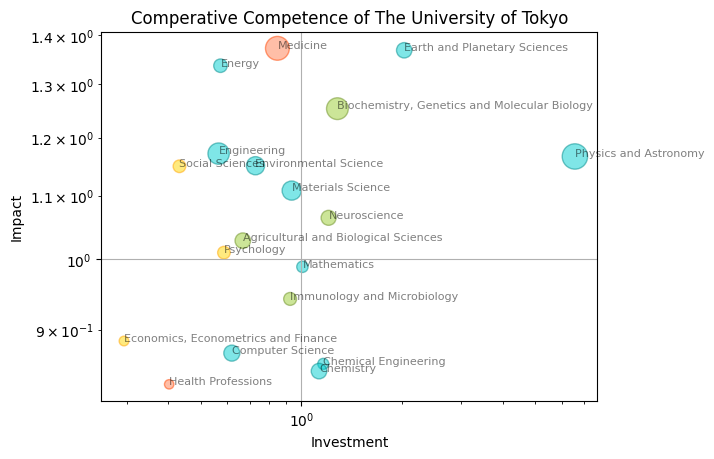

In [74]:
investment = (rca["count_x"]/rca["count_x"].mean()) / (rca["count_y"]/rca["count_y"].mean())
impact = rca["c_avg_x"]/rca["c_avg_y"]

light_colors = [ 'yellowgreen', 'gold','darkturquoise','coral']
dark_colors = ['olivedrab','orange' ,'darkcyan', 'orangered'] 

colors = rca["domain_id_x"].apply(lambda x: light_colors[x-1])
edgecolors = rca["domain_id_x"].apply(lambda x: dark_colors[x-1])

plt.scatter(investment,impact,s=rca["count_x"].apply(lambda x: math.sqrt(x)*10),c=colors,edgecolors=edgecolors, alpha=0.5)
labels = rca["field_name"]
title = Institutions()[f'{institution_id.split(sep="/")[-1]}']["display_name"]
for i, txt in enumerate(labels):
    plt.text(investment.iloc[i], impact.iloc[i], txt, fontsize=8,alpha=0.5)

plt.xscale("log")
plt.yscale("log")
plt.title(f"Comperative Competence of {title}")
plt.xlabel("Investment")
plt.ylabel("Impact")
plt.grid(True)

#旧帝大内の性格、